  #                <center> **MNIST Handwritten Digit Classification**</center>





### <center><i> Identifying digits from a dataset of handwritten images </i></center>

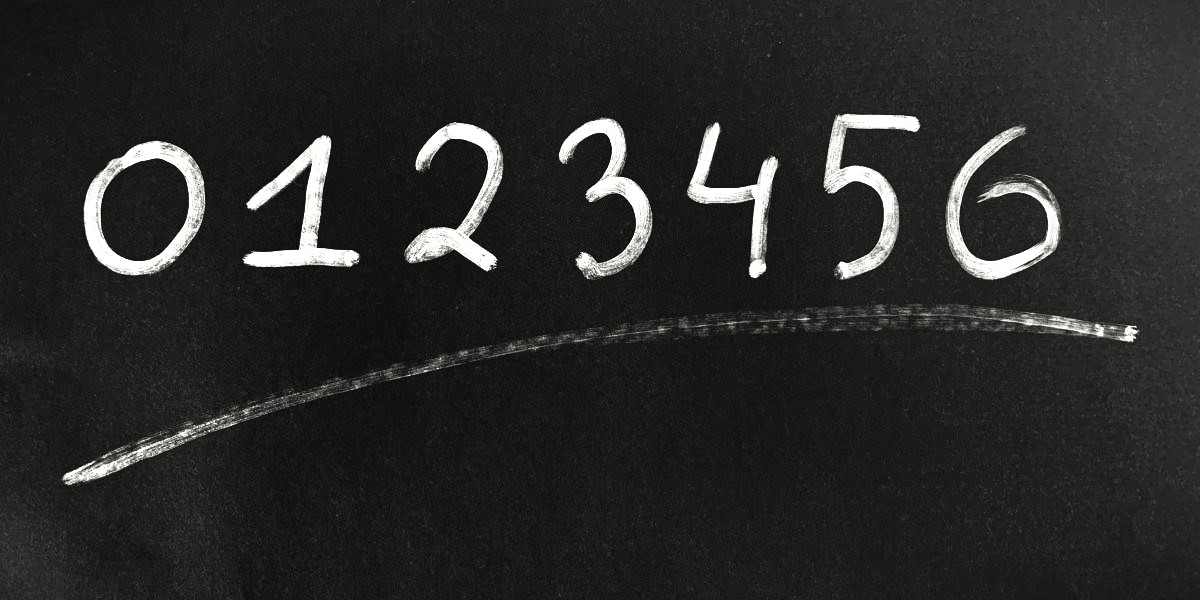

## **Data Description**

The MNIST dataset is a well-known dataset for image classification. It has the following features:



*   Dataset size: 60,000 samples of handwritten images.
*   The size of each image is 28x28 pixels.
*   Each image has only 1 color channel, i.e., grayscale image.
*   Each pixel has value in the range of [0,255] where 0 represents black, and 255 represents white.
*  Each image has labeled from 0-9.









## **Importing libraries**

In [ ]:
# for data manipulation
import pandas as pd
import numpy as np

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for loading the dataset
from keras.datasets.mnist import load_data

# for building CNN model
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping

# for evaluating performance
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

## **Loading the data**

In [ ]:
# loading the dataset
(x_train, y_train) , (x_test, y_test) = load_data()

print()
print()

# summarizing loaded dataset
print(f'Shape of train dataset: ({x_train.shape}, {y_train.shape})')
print(f'Shape of test dataset: ({x_test.shape}, {y_test.shape})')



Shape of train dataset: ((60000, 28, 28), (60000,))
Shape of test dataset: ((10000, 28, 28), (10000,))


## **Data Visualization**

### *Visualizing sample dataset*

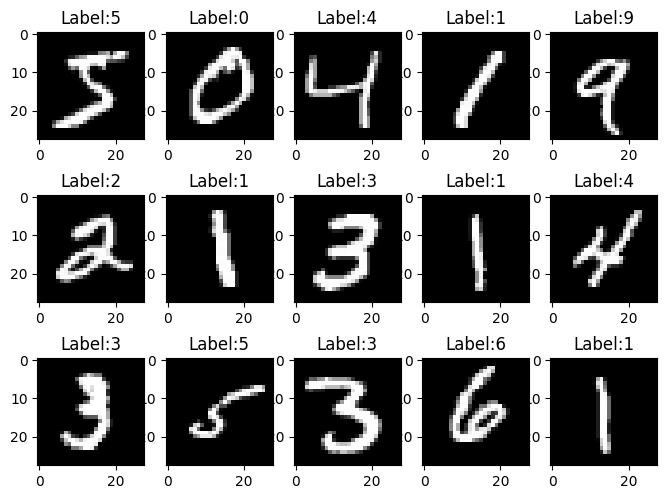

In [ ]:
# plotting first 15 images

plt.figure(figsize=(8,6))
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.imshow(x_train[i].reshape(28,28), cmap= plt.get_cmap('gray'))
  plt.title(f"Label:{y_train[i]}")
plt.show()

### *Count of each class : Training dataset*

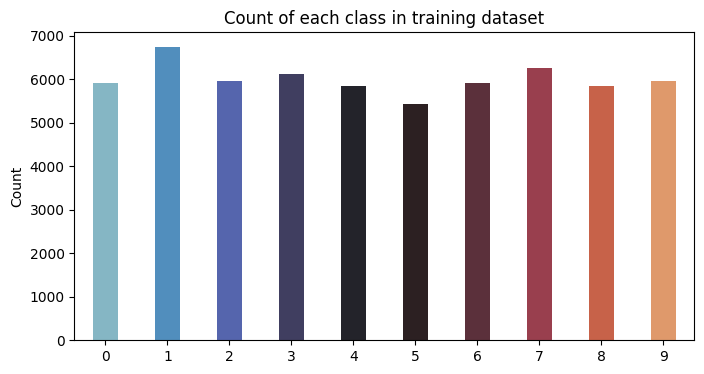

In [ ]:
label, count = np.unique(y_train, return_counts=True)
unique_count = pd.DataFrame(data = count, index=label, columns = ['Count'])

plt.figure(figsize=(8,4))
sns.barplot(data = unique_count , x = unique_count.index, y='Count', palette='icefire', width=0.4).set_title('Count of each class in training dataset', fontsize=12)
plt.show()

### *Count of each class : Test dataset*

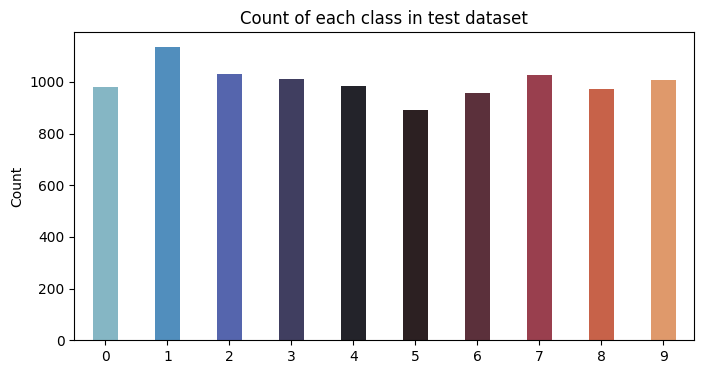

In [ ]:
label, count = np.unique(y_test, return_counts=True)
unique_count = pd.DataFrame(data = count, index=label, columns = ['Count'])

plt.figure(figsize=(8,4))
sns.barplot(data = unique_count , x = unique_count.index, y='Count', palette='icefire', width=0.4).set_title('Count of each class in test dataset', fontsize=12)
plt.show()

## **Data Preparation**

In [ ]:
# Reshaping the dataset
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

# Printing Shape of dataset
print(f'Shape of train dataset: {x_train.shape}, {y_train.shape}')
print(f'Shape of test dataset: {x_test.shape}, {y_test.shape}')

Shape of train dataset: (60000, 28, 28, 1), (60000,)
Shape of test dataset: (10000, 28, 28, 1), (10000,)


In [ ]:
# Determining number of unique classes
n_class_train = len(np.unique(y_train))
print(f'Number of unique classes in training dataset: {n_class_train}')

n_class_test = len(np.unique(y_test))
print(f'Number of unique classes in test dataset: {n_class_test}')

Number of unique classes in training dataset: 10
Number of unique classes in test dataset: 10


In [ ]:
# Normalizing the data(pixel values)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

## **Model Building**

### CNN Model
A Convolutional Neural Network, also known as CNN, is a class of neural networks that specializes in processing data that has a grid-like topology, such as an image. A digital image is a binary representation of visual data. It contains a series of pixels arranged in a grid-like fashion that contains pixel values to denote how bright and what color each pixel should be.

Description of Model:

3 Convolutional Blocks: Each block consists of 2 Conv2D layers with ReLU activation layers. Then a MaxPool2D layer in each block and finally, 2 Dense Layers and Output layer after Flatten layer & a Dropout Layer.

In [ ]:
# defining CNN model

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', padding = 'same', kernel_initializer = 'he_uniform', input_shape=(28,28,1)))
model.add(Conv2D(32, (3,3), activation='relu', padding = 'same', kernel_initializer = 'he_uniform'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu', padding = 'same', kernel_initializer = 'he_uniform'))
model.add(Conv2D(64, (3,3), activation='relu', padding = 'same', kernel_initializer = 'he_uniform'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(128, (3,3), activation='relu', padding = 'same', kernel_initializer = 'he_uniform'))
model.add(Conv2D(128, (3,3), activation='relu', padding = 'same', kernel_initializer = 'he_uniform'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dense(100,activation='relu', kernel_initializer = 'he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                   

### Callback
- Early Stopping : Stop training when a monitored metric has stopped improving.

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience = 10, restore_best_weights=True, verbose=0)

### Compile the model
There are 3 things to mention here :


*   Optimizer :- To minimize cost function we use different methods. We are using a default one here which is adam.​
*   Loss :- To make our model better we either minimize loss or maximize accuracy. Neural Networks always minimize loss. To measure it we can use different formulas like 'categorical_crossentropy' or 'binary_crossentropy'. Here I have used sparse_categorical_crossentropy.​


*   Metrics :- This is to denote the measure of model. Can be accuracy or some other metric.









In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## **Model Fitting**

In [ ]:
digits = model.fit(x_train, y_train,validation_split=0.2, callbacks=early_stop, batch_size = 128, epochs = 50, verbose=1)

Epoch 1/50
375/375 [==============================] - 10s 12ms/step - loss: 0.2419 - accuracy: 0.9238 - val_loss: 0.0502 - val_accuracy: 0.9837
Epoch 2/50
375/375 [==============================] - 4s 11ms/step - loss: 0.0577 - accuracy: 0.9828 - val_loss: 0.0415 - val_accuracy: 0.9885
Epoch 3/50
375/375 [==============================] - 4s 11ms/step - loss: 0.0387 - accuracy: 0.9883 - val_loss: 0.0349 - val_accuracy: 0.9893
Epoch 4/50
375/375 [==============================] - 4s 11ms/step - loss: 0.0296 - accuracy: 0.9912 - val_loss: 0.0354 - val_accuracy: 0.9892
Epoch 5/50
375/375 [==============================] - 4s 12ms/step - loss: 0.0241 - accuracy: 0.9926 - val_loss: 0.0316 - val_accuracy: 0.9918
Epoch 6/50
375/375 [==============================] - 4s 11ms/step - loss: 0.0190 - accuracy: 0.9938 - val_loss: 0.0407 - val_accuracy: 0.9896
Epoch 7/50
375/375 [==============================] - 4s 12ms/step - loss: 0.0187 - accuracy: 0.9942 - val_loss: 0.0257 - val_accuracy: 0.992

## **Model Evaluation**

In [ ]:
# evaluating training dataset
loss,acc = model.evaluate(x_train, y_train, verbose = 1)

print('The accuracy of the model for training data is:',acc*100)
print('The Loss of the model for training data is:',loss)


1875/1875 [==============================] - 7s 4ms/step - loss: 0.0107 - accuracy: 0.9967
The accuracy of the model for training data is: 99.673330783844
The Loss of the model for training data is: 0.010692299343645573


## **Visualizing performance**

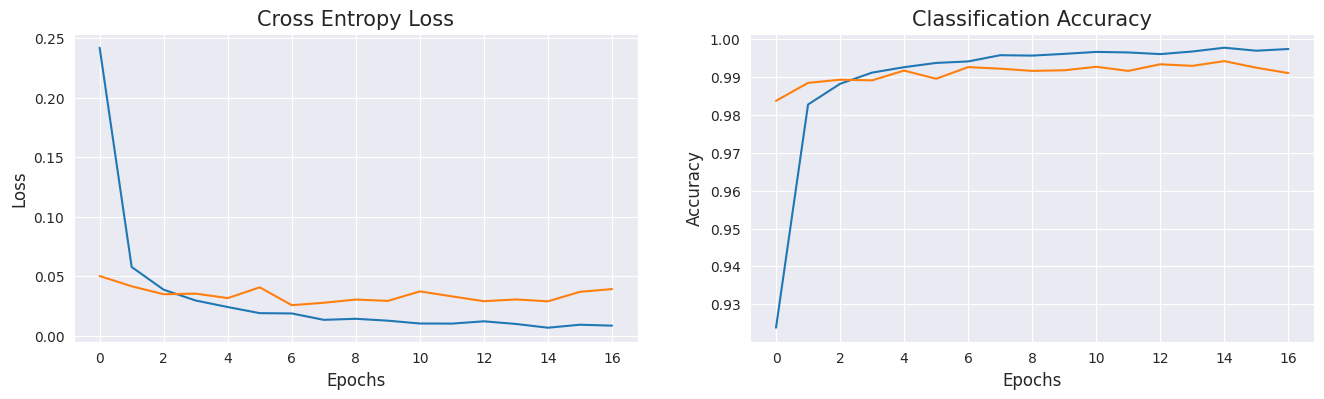

In [ ]:
# plots for accuracy and Loss with epochs

error = pd.DataFrame(digits.history)

plt.figure(figsize=(16,4))
sns.set_style('darkgrid')

plt.subplot(121)
plt.title('Cross Entropy Loss',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.plot(error['loss'])
plt.plot(error['val_loss'])


plt.subplot(122)
plt.title('Classification Accuracy',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.plot(error['accuracy'])
plt.plot(error['val_accuracy'])


plt.show()

## **Model Prediction**

In [ ]:
# prediction
result = model.predict(x_test,verbose = 1)
y_pred = np.argmax(result, axis = 1)

print(y_pred)

313/313 [==============================] - 1s 3ms/step
[7 2 1 ... 4 5 6]


In [ ]:
# Evaluating prediction
loss,acc = model.evaluate(x_test,y_test, verbose = 1)

print('The accuracy of the model for test dataset is:',acc*100)
print('The Loss of the model for test dataset is:',loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.0197 - accuracy: 0.9944
The accuracy of the model for test dataset is: 99.44000244140625
The Loss of the model for test dataset is: 0.019729796797037125


In [ ]:
## Printing classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       0.99      1.00      1.00      1135
           2       1.00      1.00      1.00      1032
           3       1.00      0.99      0.99      1010
           4       0.99      1.00      1.00       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      1.00       974
           9       1.00      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



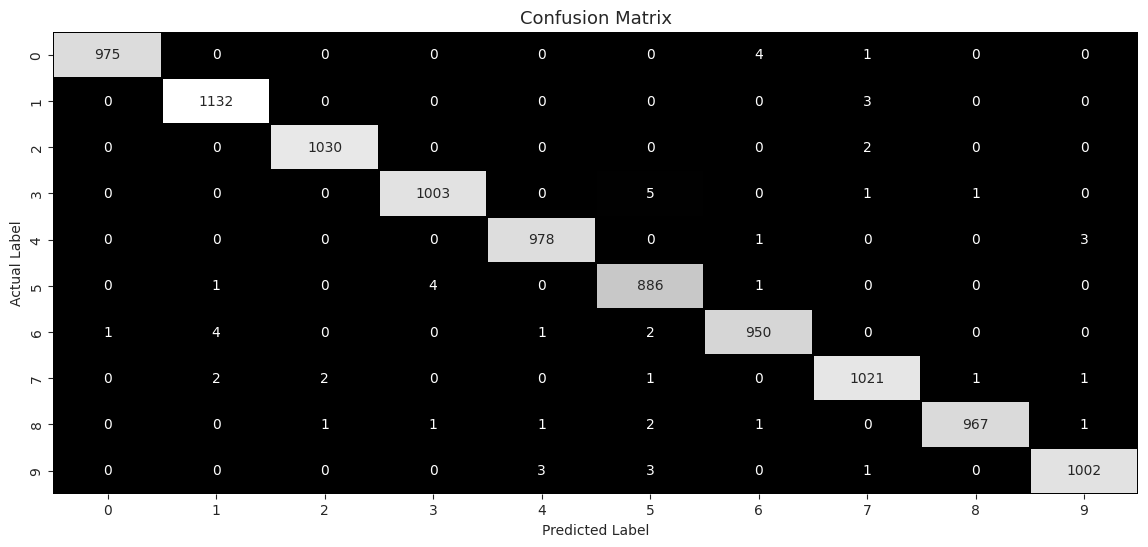

In [ ]:
## Displaying confusion matrix
matrix = confusion_matrix(y_test,y_pred)

sns.set_style('ticks')
f,ax = plt.subplots(figsize = (14,6))
sns.heatmap(matrix, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="black", fmt='.0f', ax=ax, cbar=False)

plt.xlabel("Predicted Label",fontsize=10)
plt.ylabel("Actual Label",fontsize=10)
plt.title("Confusion Matrix",fontsize=13)

plt.show()

### With 99.44% accuracy, CNN model can predict handwritten digits correctly.